In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns
%matplotlib inline

In [29]:
cd C:\\Users\\apurb\\desktop\\doc

C:\Users\apurb\desktop\doc


In [30]:
df = pd.read_csv('sea-level.csv')

In [4]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [6]:
x = df['Year']

In [7]:
y = df['CSIRO Adjusted Sea Level']

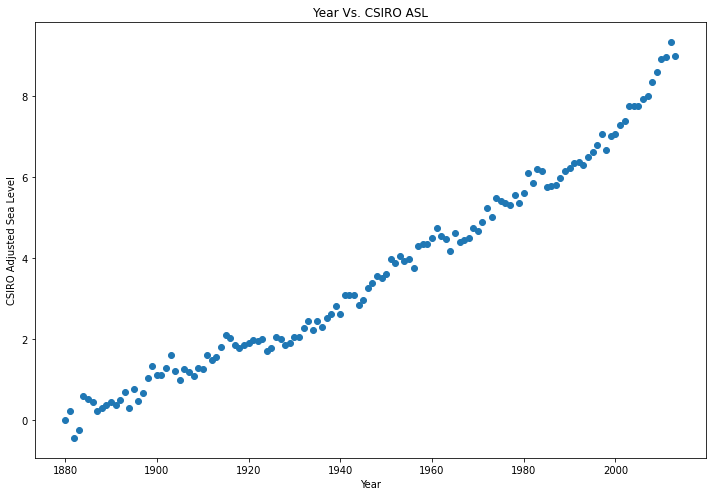

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Year Vs. CSIRO ASL')
plt.tight_layout()

In [9]:
line1 = linregress(x, y)

In [10]:
line1

LinregressResult(slope=0.06304458401213481, intercept=-119.0659419677398, rvalue=0.9847571311825852, pvalue=3.788696979109601e-102, stderr=0.0009692118713287096)

In [11]:
slope, intercept, r_value, p_value, std_err = line1

In [12]:
slope

0.06304458401213481

In [13]:
years_extended = x.append(pd.Series(range(2014, 2050)), ignore_index=True)

In [24]:
years_extended

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
165    2045
166    2046
167    2047
168    2048
169    2049
Length: 170, dtype: int64

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

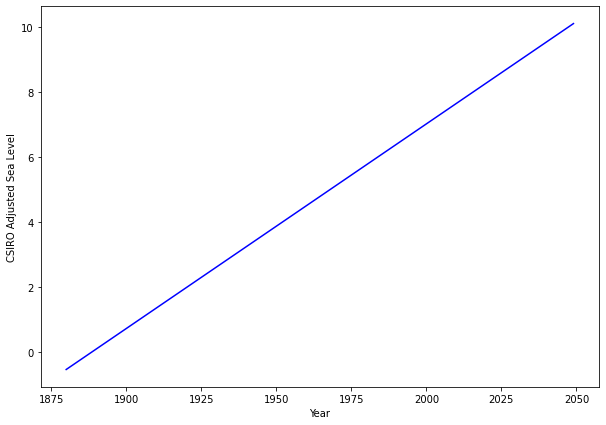

In [15]:
plt.figure(figsize=(10,7))
plt.plot(years_extended, years_extended*slope + intercept, color="blue")
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

In [16]:
year_above_2000 = df.loc[df['Year']>=2000,'Year']
CSIRO_above_2000 = df.loc[df['Year']>=2000,'CSIRO Adjusted Sea Level']

In [17]:
line2 = linregress(year_above_2000,CSIRO_above_2000)

In [18]:
line2

LinregressResult(slope=0.16642727333186808, intercept=-325.79346680596467, rvalue=0.976287571614062, pvalue=2.4388064141616947e-09, stderr=0.010652933111541106)

In [19]:
slope2, intercept2, r_value2, p_value2, std_err2 = line2

In [20]:
year_after_2000 = years_extended[years_extended>=2000]

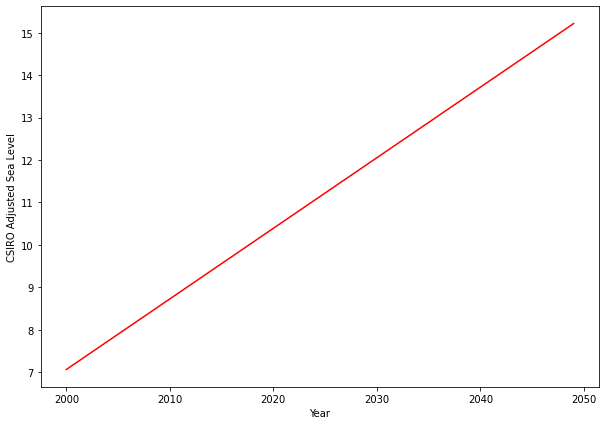

In [27]:
plt.figure(figsize=(10,7))
plt.plot(year_after_2000,year_after_2000*slope2 + intercept2, color='red')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.savefig('results.png')